In [1]:
import networkx as nx
import numpy as np
import EoN

from glob import glob

import matplotlib.pyplot as plt
%run -i "Functions.py"
import matplotlib as mpl
# Axes
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
# ticks
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# grid
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
# legend
mpl.rcParams['legend.fontsize'] = 14
# figure
mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.autolayout'] = True

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


In [3]:
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
edges = np.stack((female, male), axis=-1)
aggregated_network = nx.from_edgelist(edges)
remove = [node for node, degree in dict(aggregated_network.degree()).items() if degree < 5]
aggregated_network.remove_nodes_from(remove)

number_of_nodes = aggregated_network.number_of_nodes()
print(number_of_nodes)

3902


# SIR

### Original data

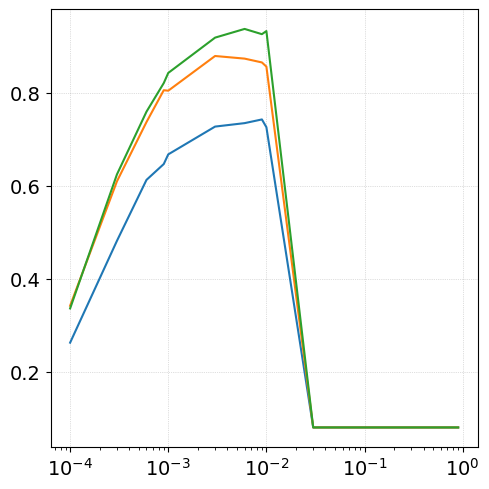

In [4]:
SIR_data=np.load(glob("./Simulations/SIR_temporal_?????_rm5.npz")[0],allow_pickle=True)
SIR_data.files

SIR_mu=SIR_data["mu"]
SIR_beta=SIR_data["beta"]
SIR_time=SIR_data["time"]
SIR_S=SIR_data["S"]
SIR_I=SIR_data["I"]
SIR_R=SIR_data["R"]

SIR_S_inf, SIR_R_inf = S_R_inf_surfaces(SIR_mu,SIR_beta,SIR_time,SIR_S,SIR_I,SIR_R,number_of_nodes)
SIR_R_inf_mu, SIR_R_inf_beta =tagli(SIR_mu,SIR_beta,SIR_R_inf,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$")

plt.plot(SIR_R_inf_mu[0][0],SIR_R_inf_mu[0][1])
plt.plot(SIR_R_inf_mu[1][0],SIR_R_inf_mu[1][1])
plt.plot(SIR_R_inf_mu[2][0],SIR_R_inf_mu[2][1])
plt.xscale("log")

## Remuved p = 0.0001

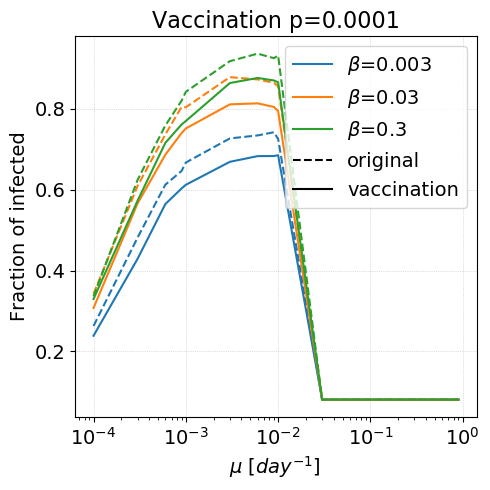

In [5]:
SIR_data_0001=np.load(glob("./Simulations/SIR_temporal_?????_prem0001_rm5.npz")[0],allow_pickle=True)
SIR_data_0001.files

SIR_mu_0001=SIR_data_0001["mu"]
SIR_beta_0001=SIR_data_0001["beta"]
SIR_time_0001=SIR_data_0001["time"]
SIR_S_0001=SIR_data_0001["S"]
SIR_I_0001=SIR_data_0001["I"]
SIR_R_0001=SIR_data_0001["R"]

SIR_S_inf_0001, SIR_R_inf_0001 = S_R_inf_surfaces(SIR_mu_0001,SIR_beta_0001,SIR_time_0001,SIR_S_0001,SIR_I_0001,SIR_R_0001,number_of_nodes)

SIR_R_inf_mu_0001, SIR_R_inf_beta_0001 =tagli(SIR_mu_0001,SIR_beta_0001,SIR_R_inf_0001,number_of_nodes,[0.003,0.03,0.3],"$R_\\infty$")


plt.plot(SIR_R_inf_mu[0][0],SIR_R_inf_mu[0][1],"--",color="C0")
plt.plot(SIR_R_inf_mu[1][0],SIR_R_inf_mu[1][1],"--",color="C1")
plt.plot(SIR_R_inf_mu[2][0],SIR_R_inf_mu[2][1],"--",color="C2")

plt.plot(SIR_R_inf_mu_0001[0][0],SIR_R_inf_mu_0001[0][1],"-",color="C0")
plt.plot(SIR_R_inf_mu_0001[1][0],SIR_R_inf_mu_0001[1][1],"-",color="C1")
plt.plot(SIR_R_inf_mu_0001[2][0],SIR_R_inf_mu_0001[2][1],"-",color="C2")

plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.ylabel("Fraction of infected")
plt.title("Vaccination p=0.0001")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIR_vax_rm5/remove_0001.pdf")

## Removed 0.001

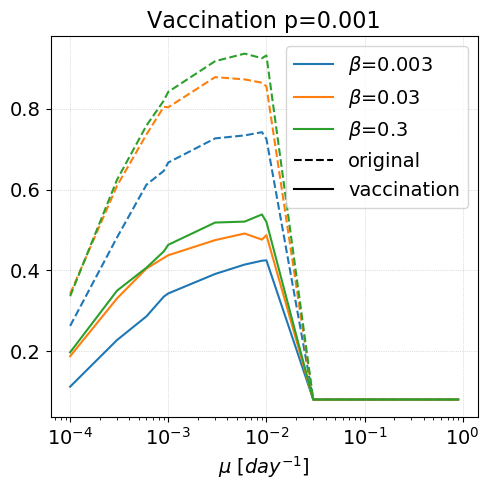

In [6]:
SIR_data_001=np.load(glob("./Simulations/SIR_temporal_?????_prem001_rm5.npz")[0],allow_pickle=True)
SIR_data_001.files

SIR_mu_001=SIR_data_001["mu"]
SIR_beta_001=SIR_data_001["beta"]
SIR_time_001=SIR_data_001["time"]
SIR_S_001=SIR_data_001["S"]
SIR_I_001=SIR_data_001["I"]
SIR_R_001=SIR_data_001["R"]

SIR_S_inf_001, SIR_R_inf_001 = S_R_inf_surfaces(SIR_mu_001,SIR_beta_001,SIR_time_001,SIR_S_001,SIR_I_001,SIR_R_001,number_of_nodes)

SIR_R_inf_mu_001, SIR_R_inf_beta_001 =tagli(SIR_mu_001,SIR_beta_001,SIR_R_inf_001,number_of_nodes,[0.003,0.03,0.3],"$R_\\infty$")


plt.plot(SIR_R_inf_mu[0][0],SIR_R_inf_mu[0][1],"--",color="C0")
plt.plot(SIR_R_inf_mu[1][0],SIR_R_inf_mu[1][1],"--",color="C1")
plt.plot(SIR_R_inf_mu[2][0],SIR_R_inf_mu[2][1],"--",color="C2")

plt.plot(SIR_R_inf_mu_001[0][0],SIR_R_inf_mu_001[0][1],"-",color="C0")
plt.plot(SIR_R_inf_mu_001[1][0],SIR_R_inf_mu_001[1][1],"-",color="C1")
plt.plot(SIR_R_inf_mu_001[2][0],SIR_R_inf_mu_001[2][1],"-",color="C2")

plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.title("Fraction of infected")
plt.title("Vaccination p=0.001")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIR_vax_rm5/remove_001.pdf")

## Removed 0.01

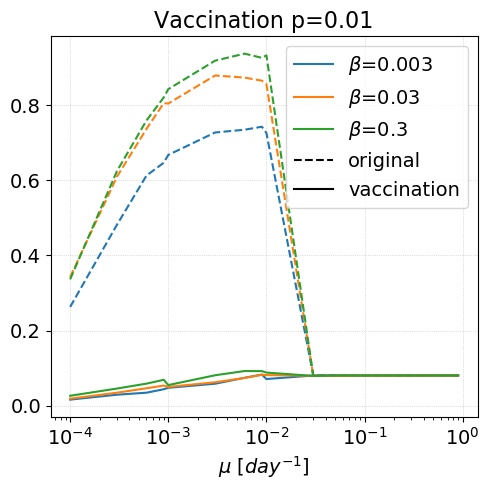

In [7]:
SIR_data_01=np.load(glob("./Simulations/SIR_temporal_?????_prem01_rm5.npz")[0],allow_pickle=True)
SIR_data_01.files

SIR_mu_01=SIR_data_01["mu"]
SIR_beta_01=SIR_data_01["beta"]
SIR_time_01=SIR_data_01["time"]
SIR_S_01=SIR_data_01["S"]
SIR_I_01=SIR_data_01["I"]
SIR_R_01=SIR_data_01["R"]

SIR_S_inf_01, SIR_R_inf_01 = S_R_inf_surfaces(SIR_mu_01,SIR_beta_01,SIR_time_01,SIR_S_01,SIR_I_01,SIR_R_01,number_of_nodes)

SIR_R_inf_mu_01, SIR_R_inf_beta_01 =tagli(SIR_mu_01,SIR_beta_01,SIR_R_inf_01,number_of_nodes,[0.003,0.03,0.3],"$R_\\infty$")


plt.plot(SIR_R_inf_mu[0][0],SIR_R_inf_mu[0][1],"--",color="C0")
plt.plot(SIR_R_inf_mu[1][0],SIR_R_inf_mu[1][1],"--",color="C1")
plt.plot(SIR_R_inf_mu[2][0],SIR_R_inf_mu[2][1],"--",color="C2")

plt.plot(SIR_R_inf_mu_01[0][0],SIR_R_inf_mu_01[0][1],"-",color="C0")
plt.plot(SIR_R_inf_mu_01[1][0],SIR_R_inf_mu_01[1][1],"-",color="C1")
plt.plot(SIR_R_inf_mu_01[2][0],SIR_R_inf_mu_01[2][1],"-",color="C2")

plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.title("Fraction of infected")
plt.title("Vaccination p=0.01")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIR_vax_rm5/remove_01.pdf")

## Removed 0.1

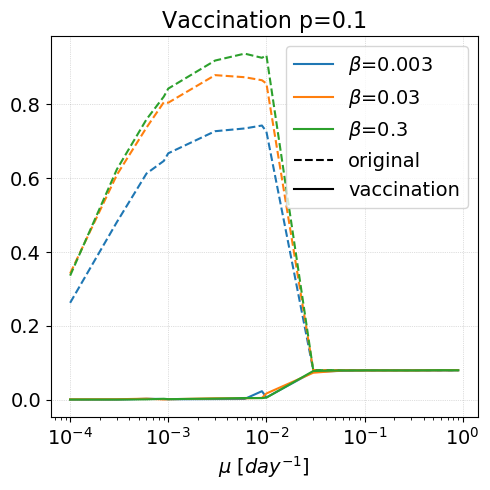

In [8]:
SIR_data_1=np.load(glob("./Simulations/SIR_temporal_?????_prem1_rm5.npz")[0],allow_pickle=True)
SIR_data_1.files

SIR_mu_1=SIR_data_1["mu"]
SIR_beta_1=SIR_data_1["beta"]
SIR_time_1=SIR_data_1["time"]
SIR_S_1=SIR_data_1["S"]
SIR_I_1=SIR_data_1["I"]
SIR_R_1=SIR_data_1["R"]

SIR_S_inf_1, SIR_R_inf_1 = S_R_inf_surfaces(SIR_mu_1,SIR_beta_1,SIR_time_1,SIR_S_1,SIR_I_1,SIR_R_1,number_of_nodes)

SIR_R_inf_mu_1, SIR_R_inf_beta_1 =tagli(SIR_mu_1,SIR_beta_1,SIR_R_inf_1,number_of_nodes,[0.003,0.03,0.3],"$R_\\infty$")


plt.plot(SIR_R_inf_mu[0][0],SIR_R_inf_mu[0][1],"--",color="C0")
plt.plot(SIR_R_inf_mu[1][0],SIR_R_inf_mu[1][1],"--",color="C1")
plt.plot(SIR_R_inf_mu[2][0],SIR_R_inf_mu[2][1],"--",color="C2")

plt.plot(SIR_R_inf_mu_1[0][0],SIR_R_inf_mu_1[0][1],"-",color="C0")
plt.plot(SIR_R_inf_mu_1[1][0],SIR_R_inf_mu_1[1][1],"-",color="C1")
plt.plot(SIR_R_inf_mu_1[2][0],SIR_R_inf_mu_1[2][1],"-",color="C2")

plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.title("Fraction of infected")
plt.title("Vaccination p=0.1")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIR_vax_rm5/remove_1.pdf")

# SIS

## Original data

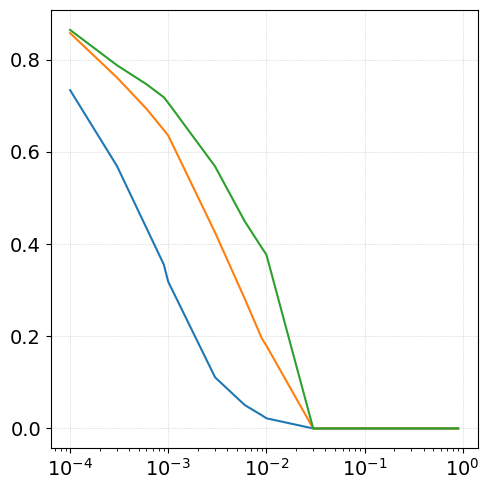

In [9]:
SIS_data=np.load(glob("./Simulations/SIS_temporal_?????_rm5.npz")[0],allow_pickle=True)
SIS_data.files

SIS_mu=SIS_data["mu"]
SIS_beta=SIS_data["beta"]
SIS_time=SIS_data["time"]
SIS_S=SIS_data["S"]
SIS_I=SIS_data["I"]
_=[]

SIS_S_inf, SIS_I_inf = S_R_inf_surfaces(SIS_mu,SIS_beta,SIS_time,SIS_S,_,SIS_I,number_of_nodes)

SIS_S_inf_mu, SIS_S_inf_beta =tagli(SIS_mu,SIS_beta,SIS_S_inf,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$")

SIS_I_inf_mu, SIS_I_inf_beta =tagli(SIS_mu,SIS_beta,SIS_I_inf,number_of_nodes,[0.003,0.03,0.3],"$I_\\infty$")



plt.plot(SIS_I_inf_mu[0][0],SIS_I_inf_mu[0][1])
plt.plot(SIS_I_inf_mu[1][0],SIS_I_inf_mu[1][1])
plt.plot(SIS_I_inf_mu[2][0],SIS_I_inf_mu[2][1])
plt.xscale("log")

## Removed p = 0.0001

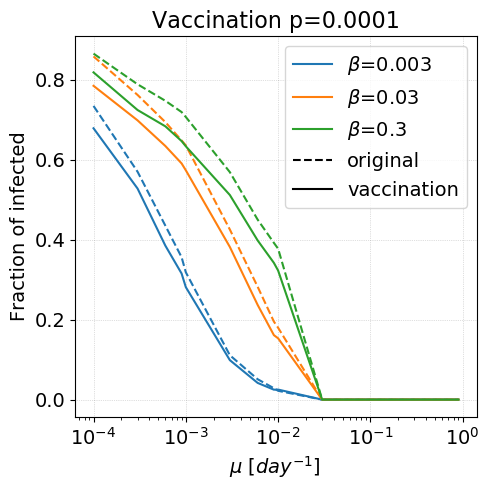

In [10]:
SIS_data_0001=np.load(glob("./Simulations/SIS_temporal_?????_prem0001_rm5.npz")[0],allow_pickle=True)

SIS_mu_0001=SIS_data_0001["mu"]
SIS_beta_0001=SIS_data_0001["beta"]
SIS_time_0001=SIS_data_0001["time"]
SIS_S_0001=SIS_data_0001["S"]
SIS_I_0001=SIS_data_0001["I"]

SIS_S_inf_0001, SIS_I_inf_0001 = S_R_inf_surfaces(SIS_mu_0001,SIS_beta_0001,SIS_time_0001,SIS_S_0001,_,SIS_I_0001,number_of_nodes)

SIS_S_inf_mu_0001, SIS_S_inf_beta_0001 =tagli(SIS_mu_0001,SIS_beta_0001,SIS_S_inf_0001,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$")
SIS_I_inf_mu_0001, SIS_I_inf_beta_0001 =tagli(SIS_mu_0001,SIS_beta_0001,SIS_I_inf_0001,number_of_nodes,[0.003,0.03,0.3],"$I_\\infty$")

plt.plot(SIS_I_inf_mu[0][0],SIS_I_inf_mu[0][1],"--",color="C0")
plt.plot(SIS_I_inf_mu[1][0],SIS_I_inf_mu[1][1],"--",color="C1")
plt.plot(SIS_I_inf_mu[2][0],SIS_I_inf_mu[2][1],"--",color="C2")

plt.plot(SIS_I_inf_mu_0001[0][0],SIS_I_inf_mu_0001[0][1],"-",color="C0")
plt.plot(SIS_I_inf_mu_0001[1][0],SIS_I_inf_mu_0001[1][1],"-",color="C1")
plt.plot(SIS_I_inf_mu_0001[2][0],SIS_I_inf_mu_0001[2][1],"-",color="C2")



plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.ylabel("Fraction of infected")
plt.title("Vaccination p=0.0001")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIS_vax_rm5/remove_0001.pdf")

## Remuved p=0.001

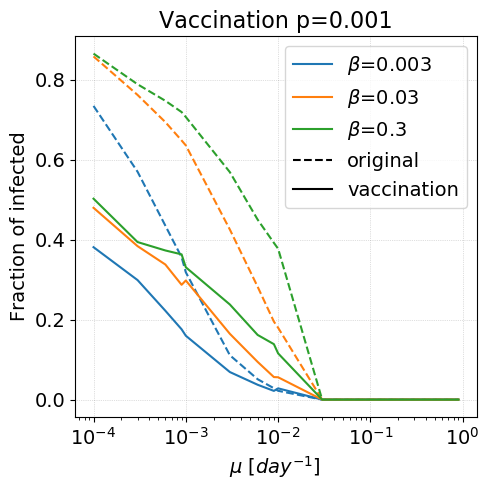

In [11]:
SIS_data_001=np.load(glob("./Simulations/SIS_temporal_?????_prem001_rm5.npz")[0],allow_pickle=True)

SIS_mu_001=SIS_data_001["mu"]
SIS_beta_001=SIS_data_001["beta"]
SIS_time_001=SIS_data_001["time"]
SIS_S_001=SIS_data_001["S"]
SIS_I_001=SIS_data_001["I"]

SIS_S_inf_001, SIS_I_inf_001 = S_R_inf_surfaces(SIS_mu_001,SIS_beta_001,SIS_time_001,SIS_S_001,_,SIS_I_001,number_of_nodes)

SIS_S_inf_mu_001, SIS_S_inf_beta_001 =tagli(SIS_mu_001,SIS_beta_001,SIS_S_inf_001,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$")
SIS_I_inf_mu_001, SIS_I_inf_beta_001 =tagli(SIS_mu_001,SIS_beta_001,SIS_I_inf_001,number_of_nodes,[0.003,0.03,0.3],"$I_\\infty$")


plt.plot(SIS_I_inf_mu[0][0],SIS_I_inf_mu[0][1],"--",color="C0")
plt.plot(SIS_I_inf_mu[1][0],SIS_I_inf_mu[1][1],"--",color="C1")
plt.plot(SIS_I_inf_mu[2][0],SIS_I_inf_mu[2][1],"--",color="C2")

plt.plot(SIS_I_inf_mu_001[0][0],SIS_I_inf_mu_001[0][1],"-",color="C0")
plt.plot(SIS_I_inf_mu_001[1][0],SIS_I_inf_mu_001[1][1],"-",color="C1")
plt.plot(SIS_I_inf_mu_001[2][0],SIS_I_inf_mu_001[2][1],"-",color="C2")



plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.ylabel("Fraction of infected")
plt.title("Vaccination p=0.001")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIS_vax_rm5/remove_001.pdf")

# Removed p=0.01

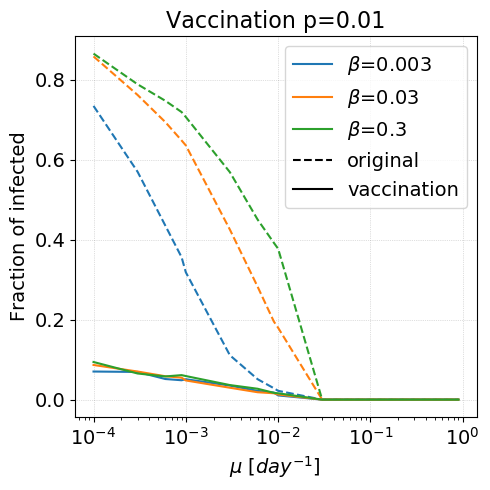

In [12]:
SIS_data_01=np.load(glob("./Simulations/SIS_temporal_?????_prem01_rm5.npz")[0],allow_pickle=True)

SIS_mu_01=SIS_data_01["mu"]
SIS_beta_01=SIS_data_01["beta"]
SIS_time_01=SIS_data_01["time"]
SIS_S_01=SIS_data_01["S"]
SIS_I_01=SIS_data_01["I"]

SIS_S_inf_01, SIS_I_inf_01 = S_R_inf_surfaces(SIS_mu_01,SIS_beta_01,SIS_time_01,SIS_S_01,_,SIS_I_01,number_of_nodes)

SIS_S_inf_mu_01, SIS_S_inf_beta_01 =tagli(SIS_mu_01,SIS_beta_01,SIS_S_inf_01,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$")
SIS_I_inf_mu_01, SIS_I_inf_beta_01 =tagli(SIS_mu_01,SIS_beta_01,SIS_I_inf_01,number_of_nodes,[0.003,0.03,0.3],"$I_\\infty$")


plt.plot(SIS_I_inf_mu[0][0],SIS_I_inf_mu[0][1],"--",color="C0")
plt.plot(SIS_I_inf_mu[1][0],SIS_I_inf_mu[1][1],"--",color="C1")
plt.plot(SIS_I_inf_mu[2][0],SIS_I_inf_mu[2][1],"--",color="C2")

plt.plot(SIS_I_inf_mu_01[0][0],SIS_I_inf_mu_01[0][1],"-",color="C0")
plt.plot(SIS_I_inf_mu_01[1][0],SIS_I_inf_mu_01[1][1],"-",color="C1")
plt.plot(SIS_I_inf_mu_01[2][0],SIS_I_inf_mu_01[2][1],"-",color="C2")



plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.ylabel("Fraction of infected")
plt.title("Vaccination p=0.01")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIS_vax_rm5/remove_01.pdf")

# Removed p=0.1

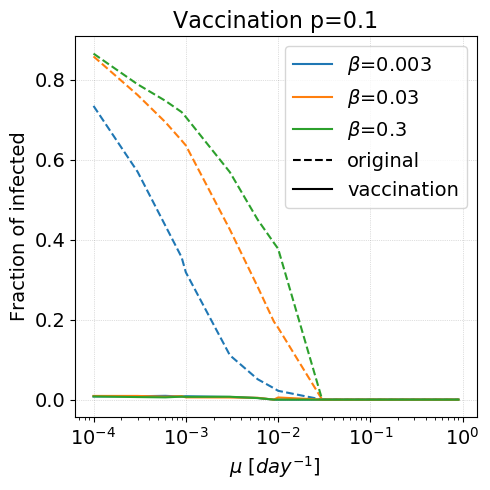

In [13]:
SIS_data_1=np.load(glob("./Simulations/SIS_temporal_?????_prem1_rm5.npz")[0],allow_pickle=True)

SIS_mu_1=SIS_data_1["mu"]
SIS_beta_1=SIS_data_1["beta"]
SIS_time_1=SIS_data_1["time"]
SIS_S_1=SIS_data_1["S"]
SIS_I_1=SIS_data_1["I"]

SIS_S_inf_1, SIS_I_inf_1 = S_R_inf_surfaces(SIS_mu_1,SIS_beta_1,SIS_time_1,SIS_S_1,_,SIS_I_1,number_of_nodes)

SIS_S_inf_mu_1, SIS_S_inf_beta_1 =tagli(SIS_mu_1,SIS_beta_1,SIS_S_inf_1,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$")
SIS_I_inf_mu_1, SIS_I_inf_beta_1 =tagli(SIS_mu_1,SIS_beta_1,SIS_I_inf_1,number_of_nodes,[0.003,0.03,0.3],"$I_\\infty$")


plt.plot(SIS_I_inf_mu[0][0],SIS_I_inf_mu[0][1],"--",color="C0")
plt.plot(SIS_I_inf_mu[1][0],SIS_I_inf_mu[1][1],"--",color="C1")
plt.plot(SIS_I_inf_mu[2][0],SIS_I_inf_mu[2][1],"--",color="C2")

plt.plot(SIS_I_inf_mu_1[0][0],SIS_I_inf_mu_1[0][1],"-",color="C0")
plt.plot(SIS_I_inf_mu_1[1][0],SIS_I_inf_mu_1[1][1],"-",color="C1")
plt.plot(SIS_I_inf_mu_1[2][0],SIS_I_inf_mu_1[2][1],"-",color="C2")



plt.plot([],color="C0",label="$\\beta$=0.003")
plt.plot([],color="C1",label="$\\beta$=0.03")
plt.plot([],color="C2",label="$\\beta$=0.3")
plt.plot([],"--",color="black",label="original")
plt.plot([],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$ ")
plt.ylabel("Fraction of infected")
plt.title("Vaccination p=0.1")
plt.legend()
plt.xscale("log")

plt.savefig("./Figure/SIS_vax_rm5/remove_1.pdf")